In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

# Here we focus only on data from Lausanne marathon 2016 

In [2]:
trial_dataset = pd.read_pickle('../datasets/trial_dataset')
print(trial_dataset.shape)
trial_dataset.head()

(220, 6)


,nom,nat,an,lieu,temps,cat/rang
0,Bekele-Clerc Alemitu,BEL,1976,Bern,"2:42.41,0",42-D40
1,Yerly Laurence,SUI,1972,Cernier,"2:51.45,8",42-D40
2,Vrajic Marija,CRO,1976,CRO-Zagreb,Maksimir,42-D40
3,Morall Zelah,SUI,1969,GB-Penzance,"2:53.43,2",42-D40
4,Annen-Lamard Sandra,SUI,1977,Ecublens,-----,42-D30


## Stats on age

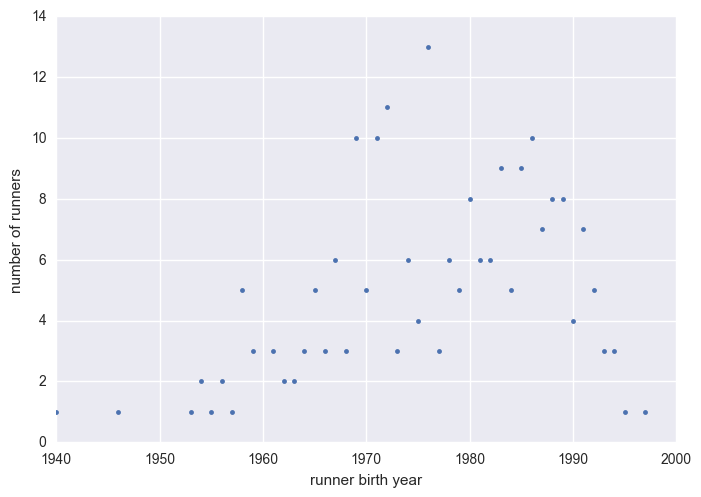

In [3]:
age_men = trial_dataset.an.value_counts()

plt.plot(age_men,marker='.',linestyle='')
plt.xlabel('runner birth year')
plt.ylabel('number of runners')

## Stats on original country 

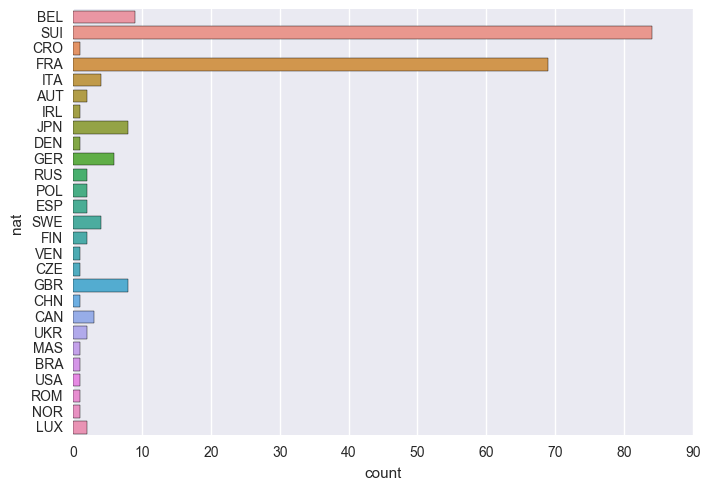

In [4]:
sns.countplot(y=trial_dataset.nat)

## Stats on town of residency

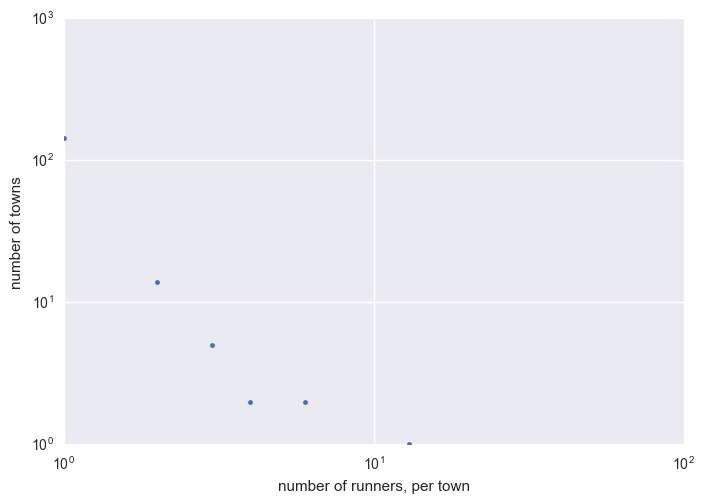

In [6]:
lieu_distr = trial_dataset.lieu.value_counts().value_counts()

# plt.plot(lieu_distr,marker='.',linestyle='')
plt.loglog(lieu_distr,marker='.',linestyle='')
plt.xlabel('number of runners, per town')
plt.ylabel('number of towns')

## Stats on race time

In [8]:
# issues -->  due to the presence of strings --> due to issues on parsing!!

# sns.distplot(trial_dataset.temps,kde=False) 